## **Open rituals**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import xgboost as xgb
import numpy as np
import seaborn as sns
import os
from scipy import stats

## **Barplot**

### A. barplot with different colors

<function matplotlib.pyplot.show(close=None, block=None)>

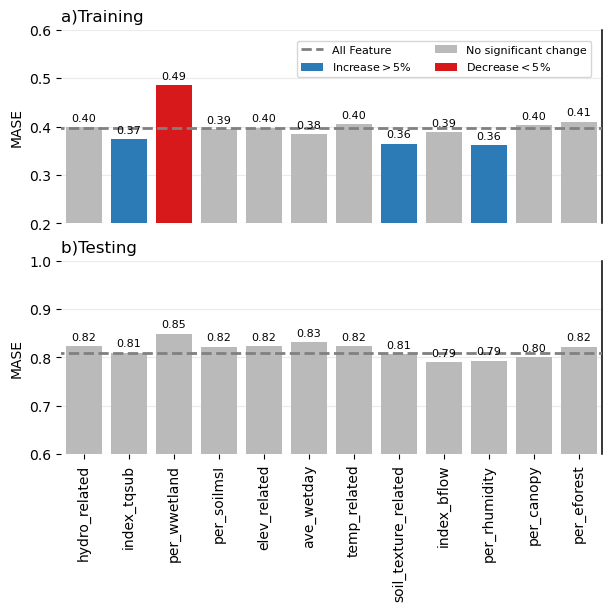

In [4]:
std = 0.396276503685879
below_average = plot_data[plot_data['train']<= 0.95*std]
nc = plot_data[(plot_data['train']> 0.95*std) & (plot_data['train']< 1.05*std)]
above_average = plot_data[plot_data['train']>= 1.05*std]
colors_high = ["#d7191c", "#d7191c"] # Extreme colours of the high scale
colors_nochange = ['#bababa', '#bababa']
colors_low = ["#2c7bb6","#2c7bb6"] # Extreme colours of the low scale

cmap_low = mpl.colors.LinearSegmentedColormap.from_list("low_map", colors_low, N=256)
cmap_nochange = mpl.colors.LinearSegmentedColormap.from_list("low_map", colors_nochange, N=256)
cmap_high = mpl.colors.LinearSegmentedColormap.from_list("high_map", colors_high, N=256)

norm_low = mpl.colors.Normalize(below_average['train'].min(), 0.98*std) # linearly normalizes data into the [0.0, 1.0] interval
norm_nochange = mpl.colors.Normalize(0.98*std, 1.02*std)
norm_high = mpl.colors.Normalize(1.02*std, above_average['train'].max())

fig = plt.figure(figsize=(6,6), constrained_layout=True)
fig.patch.set_facecolor('white')
plt.rcParams['font.size'] = 10
spec = fig.add_gridspec(2, 1)

ax0 = fig.add_subplot(spec[0, 0])
ax0.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

bar1 = ax0.bar(below_average['label'], below_average['train'], color=cmap_low(norm_low(below_average['train'])), width=0.8, label='Increase$> 5\%$', zorder=2)
barnc = ax0.bar(nc['label'], nc['train'], color=cmap_nochange(norm_nochange(nc['train'])), width=0.8, label='No significant change', zorder=2)
bar2 = ax0.bar(above_average['label'], above_average['train'], color=cmap_high(norm_high(above_average['train'])), width=0.8, label='Decrease$< 5\%$', zorder=2)
ax0.bar_label(bar1, labels=[f'{e:,.2f}' for e in below_average['train']], padding=3, color='black', fontsize=8, zorder = 4) 
ax0.bar_label(barnc, labels=[f'{e:,.2f}' for e in nc['train']], padding=3, color='black', fontsize=8, zorder = 4) 
ax0.bar_label(bar2, labels=[f'{e:,.2f}' for e in above_average['train']], padding=3, color='black', fontsize=8, zorder = 4) 
ax0.hlines(y = std , xmin=-1, xmax=12, linewidth=2, linestyle = '--', color = 'grey', label = 'All Feature' ,zorder = 3)

ax0.set_ylabel('MASE')
ax0.set_ylim((0.2, 0.6))
ax0.set_xticks([])
ax0.set_xlim((-0.5,11.5))
ax0.set_title('a)Training', loc = 'left')
ax0.spines[['top','left','bottom']].set_visible(False)
ax0.spines['right'].set_linewidth(1.1)
ax0.legend(loc=7, bbox_to_anchor=(0.98, 0.85), ncol=2, borderaxespad=0, frameon=True, fontsize=8)


std_1 = 0.809636747394518
below_average_1 = plot_data[plot_data['test']<=0.95*std_1]
nc_1 = plot_data[(plot_data['test']>0.95*std_1) & (plot_data['test']<1.05*std_1)]
above_average_1 = plot_data[plot_data['test']>=1.05*std_1]
norm_low_1 = mpl.colors.Normalize(below_average_1['test'].min(), 0.95*std_1) # linearly normalizes data into the [0.0, 1.0] 
norm_nc_1 = mpl.colors.Normalize(0.95*std_1, 1.05*std_1)
norm_high_1 = mpl.colors.Normalize(1.05*std_1, above_average_1['test'].max())


ax1 = fig.add_subplot(spec[1, 0])
ax1.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)
bar3 = ax1.bar(below_average_1['label'], below_average_1['test'], color=cmap_low(norm_low_1(below_average_1['test'])), width=0.8, zorder=2)
barnc_1 = ax1.bar(nc_1['label'], nc_1['test'], color=cmap_nochange(norm_nc_1(nc_1['test'])), width=0.8, zorder=2)
bar4 = ax1.bar(above_average_1['label'], above_average_1['test'], color=cmap_high(norm_high_1(above_average_1['test'])), width=0.8, zorder=2)
ax1.bar_label(bar3, labels=[f'{e:,.2f}' for e in below_average_1['test']], padding=3, color='black', fontsize=8, zorder = 4) 
ax1.bar_label(barnc_1, labels=[f'{e:,.2f}' for e in nc_1['test']], padding=3, color='black', fontsize=8, zorder = 4) 
ax1.bar_label(bar4, labels=[f'{e:,.2f}' for e in above_average_1['test']], padding=3, color='black', fontsize=8, zorder = 4) 
ax1.hlines(y = std_1 , xmin=-1, xmax=12, linewidth=2, linestyle = '--', color = 'grey', label = 'All Feature' ,zorder = 3)

ax1.set_xticks(y_pos, objective, rotation=90)
ax1.set_ylabel('MASE')
ax1.set_ylim((0.6,1))
ax1.set_xlim((-0.5,11.5))
ax1.set_title('b)Testing ', loc = 'left')
ax1.spines[['top','left','bottom']].set_visible(False)
ax1.spines['right'].set_linewidth(1.1)
plt.show

## **Histogram**

### A. Histogram with KDE

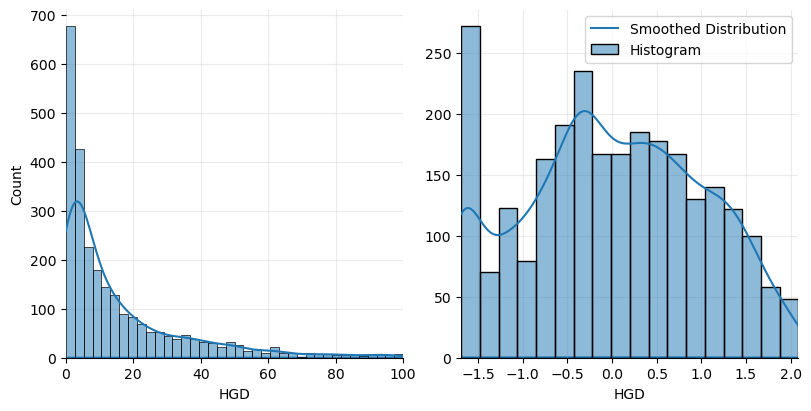

In [5]:
data = pd.read_csv(os.path.join(Path_Main,'2595_train_sites.csv'))
columns = data.columns[16:].to_list() 
before = data[columns]
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans_all = power.fit_transform(before)
after = pd.DataFrame(data_trans_all, columns = columns)

feature = columns[44]
fig = plt.figure(figsize=(8,4), constrained_layout=True)
plt.rcParams['font.size'] = 10
spec = fig.add_gridspec(1, 2)

ax10 = fig.add_subplot(spec[0, 0])
ax10.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax10.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)
ax10.spines[['top','right', 'left']].set_visible(False)
sns.histplot(data = before, x = feature, kde = True, ax = ax10, label = 'Histogram', zorder=2)
sns.kdeplot(data = before, x = feature,  ax = ax10, label = 'Smoothed Distribution', zorder = -1)
ax10.set_ylabel('Count')
ax10.set_xlim((0, 100))
ax10.set_xlabel('HGD')

ax11 = fig.add_subplot(spec[0, 1])
ax11.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax11.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)
sns.histplot(data = after, x = feature, kde = True, ax = ax11, label = 'Histogram', zorder=2)
sns.kdeplot(data = after, x = feature,  ax = ax11, label = 'Smoothed Distribution', zorder = -1)
ax11.spines[['top','right', 'left']].set_visible(False)
ax11.set_xlim((after[feature].min(), after[feature].max()))
ax11.set_ylabel('')
ax11.set_xlabel('HGD')
ax11.legend()

## **Scatter Plot**

A. density plot or Hexbins plot

In [6]:
def get_density(x:np.ndarray, y:np.ndarray):
    """Get kernal density estimate for each (x, y) point."""
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    density = kernel(values)
    return density

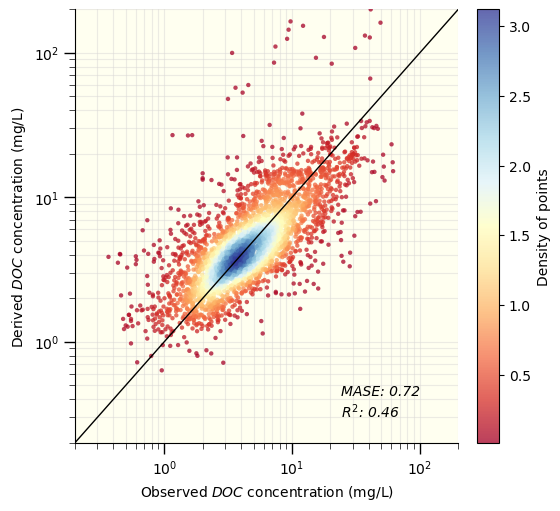

In [8]:
data = pd.read_csv(os.path.join(Path_Data, 'eval_validation.csv'))
data_doc = data.dropna(subset = 'sim_doc').reset_index(drop = True)
obs_1 = data_doc['ave_doc']
sim_1 = data_doc['sim_doc']
d = get_density(np.log10(obs_1), np.log10(sim_1))
x_1 = np.arange(0, 200, 1)

fig = plt.figure(figsize=(5.5,5), constrained_layout=True)
spec = fig.add_gridspec(1, 1)
ax01 = fig.add_subplot(spec[0, 0])
ax01.grid(which="both", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax01.grid(which="both", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)
ax01.spines[['top','right']].set_visible(False)
ax01.set_facecolor('ivory')

sca = ax01.scatter(obs_1, sim_1, s = 10, ec = 'k', linewidth = 0, c = d, cmap = 'RdYlBu', zorder=2, alpha = 0.75)
ax01.plot(x_1,x_1, c = 'k', linewidth = 1)
ax01.set_yscale('log')
ax01.set_xscale('log')
ax01.tick_params('both', length=8, width=1, which='major')
ax01.tick_params('both', length=4, width=0.5, which='minor')
ax01.set_xlim((2e-1,2e2))
ax01.set_ylim((2e-1,2e2))
ax01.set_ylabel('Derived $DOC$ concentration (mg/L)' )
ax01.set_xlabel('Observed $DOC$ concentration (mg/L)')
ax01.text(24, 0.3,
          'MASE: ' + str("{:.2f}".format(mase_plot(sim_1, obs_1))) +
          '\n$R^2$: ' + str("{:.2f}".format(np.corrcoef(obs_1, sim_1)[0,1])),
          style='italic')
cbar = plt.colorbar(sca)
cbar.set_label('Density of points', rotation=90)
plt.rcParams['font.size'] = 10